In [34]:
import numpy as np
from numpy import pi,sqrt,exp
from scipy.special import erfc
from glob import glob
import matplotlib.pyplot as plt
import os

In [2]:
from params import *

In [3]:
# parent directory
path = os.path.abspath(os.path.join(os.path.abspath('')))

In [4]:
all_files = glob(f'{path}/data/*_R_*000.npz')
all_files.sort()

In [5]:
for i,x in enumerate(all_files):
    print(f"{i:02d} : {x}")

00 : /home/gabriel/Github/SPDE-JKW-Algorithm/data/test_jkw_R_000000.npz
01 : /home/gabriel/Github/SPDE-JKW-Algorithm/data/test_jkw_R_001000.npz
02 : /home/gabriel/Github/SPDE-JKW-Algorithm/data/test_jkw_R_002000.npz
03 : /home/gabriel/Github/SPDE-JKW-Algorithm/data/test_jkw_R_003000.npz


In [35]:
def f_realsp_kernel(x):
    return exp(-.5*x*x/L/L)

def f_fourier_kernel(k):
    return sqrt(2.*pi)*L*exp(-2.*pi*pi*L*L*k*k)

def spec_analyt_visc_ornuhl_knonzero(t,k):
    beta = 8.*pi*pi*nu*k*k+alpha
    return f_fourier_kernel(k) * (1.-exp(-beta*t)) / beta

def spec_analyt_visc_ornuhl_kzero(t):
    return spec_analyt_visc_ornuhl_knonzero(t,0)

def var_analyt_visc_ornuhl(t,k):
    # depends on the forcing correlation function
    # this is for C_f(x) = e^(-x^2/2 L^2)
    return 1

def spec_analyt_ornuhl_knonzero(t,k):
    beta = 8.*pi*pi*nu
    return f_fourier_kernel(k) * (1.-exp(-beta*t)) / beta

def spec_analyt_ornuhl_kzero(t):
    return spec_analyt_ornuhl_knonzero(t,0)

def spec_analyt_visc_knonzero(t,k):
    beta = 8.*pi*pi*nu*k*k
    return f_fourier_kernel(k) * (1.-exp(-beta*t)) / beta

def spec_analyt_visc_kzero(t):
    return f_fourier_kernel(0) * t

def var_analyt_visc(t):
    # depends on the forcing correlation function
    # this is for C_f(x) = e^(-x^2/2 L^2)
    return .5*L*L/nu*(sqrt(1.+4.*nu*t/L/L)-1.)

def var_analyt_visc_ornuhl(t):
    # depends on the forcing correlation function
    # this is for C_f(x) = e^(-x^2/2 L^2)
    ct = exp(.25*L*L*alpha/nu)*.5*L*sqrt(pi/alpha/nu)
    b1 = erfc(.5*L*sqrt(alpha/nu))
    b2 = erfc(.5*sqrt(alpha*(L*L+4.*t*nu)/nu))
    return ct * (b1-b2)

def var_analyt_visc_ornuhl_asymp():
    # depends on the forcing correlation function
    # this is for C_f(x) = e^(-x^2/2 L^2)
    ct = exp(.25*L*L*alpha/nu)*L*sqrt(pi/alpha/nu)
    b1 = erfc(.5*L*sqrt(alpha/nu))
    return .5 * ct * b1

def velgrad_var_analyt_visc(t):
    # depends on the forcing correlation function
    # this is for C_f(x) = e^(-x^2/2 L^2)
    return .5/nu*(1.-L/sqrt(L*L+4*t*nu))

def velgrad_var_analyt_visc_asymp():
    # depends on the forcing correlation function
    # this is for C_f(x) = e^(-x^2/2 L^2)
    return .5/nu

def velgrad_var_analyt_visc_ornuhl(t):
    # depends on the forcing correlation function
    # this is for C_f(x) = e^(-x^2/2 L^2)
    c1 = .25/nu
    ct = exp(.25*L*L*alpha/nu)*L*sqrt(pi/alpha/nu)
    
    b1 = 2.
    b2 = 2.*exp(-t*alpha)*L/sqrt(L*L+4.*t*nu)
    b3 = ct * erfc(.5*L*sqrt(alpha/nu))
    b4 = ct * erfc(.5*sqrt(alpha*(L*L+4.*t*nu)/nu))
    return c1 * (b1-b2-b3+b4)

def velgrad_var_analyt_visc_ornuhl_asymp():
    # depends on the forcing correlation function
    # this is for C_f(x) = e^(-x^2/2 L^2)
    c1 = .25/nu
    ct = exp(.25*L*L*alpha/nu)*L*sqrt(pi/alpha/nu)
    
    b1 = 2.
    b3 = ct * erfc(.5*L*sqrt(alpha/nu))
    return c1 * (b1-b3)

**Load fields**

In [36]:
# simulation prefix
P = 3

In [37]:
all_files = glob(f'{path}/data/*_R_{P:03d}*.npz')
all_files.sort()

In [38]:
len(all_files)

96

In [39]:
K = np.fft.fftfreq(N) * N

In [40]:
colors = plt.cm.viridis(np.linspace(1,0,10))

**Profile in Space**

In [12]:
X = np.fft.fftfreq(N) * Ltotal

In [13]:
f = all_files[np.random.randint(len(all_files))]

npzfile = np.load(f)

v_real = npzfile['v_real']

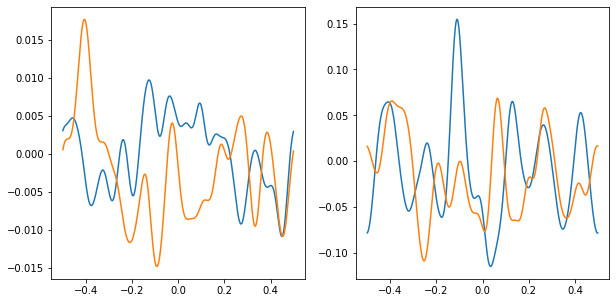

In [14]:
fig, axs = plt.subplots(1,2,figsize=(10,5))

# initial profile of velocity field
axs[0].plot(np.fft.fftshift(X),np.fft.fftshift(np.real(v_real[0,:])))
axs[0].plot(np.fft.fftshift(X),np.fft.fftshift(np.imag(v_real[0,:])))
# final profile of velocity field
axs[1].plot(np.fft.fftshift(X),np.fft.fftshift(np.real(v_real[99,:])))
axs[1].plot(np.fft.fftshift(X),np.fft.fftshift(np.imag(v_real[99,:])))

plt.show()

**Forcing spectrum, time average**

In [15]:
spec_f = np.zeros((N,),dtype=np.float64)

In [16]:
f = all_files[np.random.randint(len(all_files))]
    
npzfile = np.load(f)

f_four = npzfile['f_four']

spec_f = np.mean(np.abs(f_four)**2,axis=0) / N

spec_f_theo = f_fourier_kernel(K)

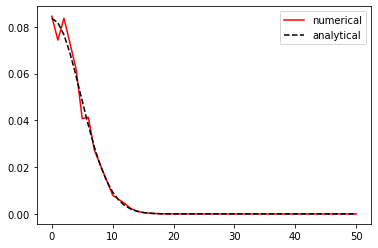

In [17]:
#plt.plot(spec)
scale = 20
plt.plot(K[:N//scale],spec_f[:N//scale], color='red', label='numerical')
plt.plot(K[:N//scale],spec_f_theo[:N//scale], color='k', linestyle='dashed', label='analytical')
plt.legend()
plt.show()

**Forcing spectrum, ensemble average**

In [18]:
spec_f = np.zeros((N,),dtype=np.float64)

In [19]:
for i,f in enumerate(all_files):

    npzfile = np.load(f)

    f_four = npzfile['f_four']

    spec_f += np.mean(np.abs(f_four)**2,axis=0) / N
    
spec_f *= 1./len(all_files)

spec_f_theo = f_fourier_kernel(K)

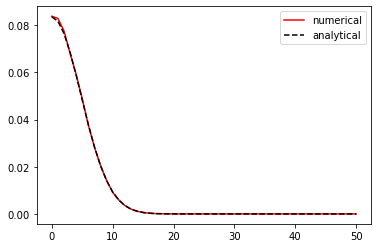

In [20]:
#plt.plot(spec)
scale = 20
plt.plot(K[:N//scale],spec_f[:N//scale], color='red', label='numerical')
plt.plot(K[:N//scale],spec_f_theo[:N//scale], color='k', linestyle='dashed', label='analytical')
plt.legend()
plt.show()

**Forcing correlation function, time average**

In [21]:
corrf_f = np.zeros((N,),dtype=np.float64)

In [22]:
f = all_files[np.random.randint(len(all_files))]
    
npzfile = np.load(f)

f_real = npzfile['f_real']

for i in range(N):
    corrf_f[i] = np.mean( np.abs( f_real * np.conj(np.roll(f_real,i,axis=1)) ) )

corrf_f_theo = f_realsp_kernel(X)

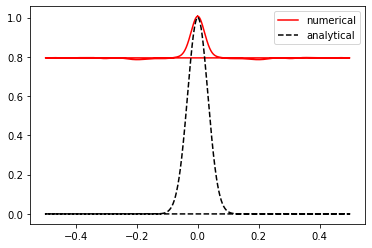

In [23]:
#plt.plot(spec)
scale = 1
plt.plot(X[:N//scale],N*corrf_f[:N//scale], color='red', label='numerical')
plt.plot(X[:N//scale],corrf_f_theo[:N//scale], color='k', linestyle='dashed', label='analytical')
plt.legend()
plt.show()

**Forcing correlation function, ensemble average**

In [24]:
corrf_f = np.zeros((N,),dtype=np.float64)

In [25]:
for i,f in enumerate(all_files):

    npzfile = np.load(f)

    f_real = npzfile['f_real']

    for i in range(N):
        corrf_f[i] += np.mean( np.abs( f_real * np.conj(np.roll(f_real,i,axis=1)) ) )
    
corrf_f *= 1./len(all_files)

corrf_f_theo = f_realsp_kernel(X)

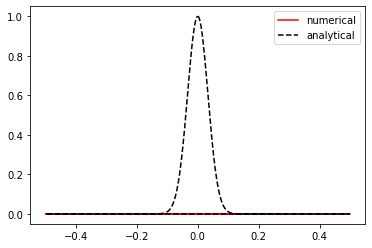

In [26]:
#plt.plot(spec)
scale = 1
plt.plot(X[:N//scale],corrf_f[:N//scale], color='red', label='numerical')
plt.plot(X[:N//scale],corrf_f_theo[:N//scale], color='k', linestyle='dashed', label='analytical')
plt.legend()
plt.show()

**Solution spectrum**

In [21]:
spec = np.zeros((10,N,),dtype=np.float64)

In [22]:
for f in all_files:
    
    npzfile = np.load(f)

    #v_real = npzfile['v_real']
    v_four = npzfile['v_four']

    spec[0,:] += np.abs(v_four[           0,:])**2 / N
    spec[1,:] += np.abs(v_four[1*N_eval//10,:])**2 / N
    spec[2,:] += np.abs(v_four[2*N_eval//10,:])**2 / N
    spec[3,:] += np.abs(v_four[3*N_eval//10,:])**2 / N
    spec[4,:] += np.abs(v_four[4*N_eval//10,:])**2 / N
    spec[5,:] += np.abs(v_four[5*N_eval//10,:])**2 / N
    spec[6,:] += np.abs(v_four[6*N_eval//10,:])**2 / N
    spec[7,:] += np.abs(v_four[7*N_eval//10,:])**2 / N
    spec[8,:] += np.abs(v_four[8*N_eval//10,:])**2 / N
    spec[9,:] += np.abs(v_four[9*N_eval//10,:])**2 / N
    
spec *= 1./len(all_files)

In [23]:
K = np.fft.fftfreq(N) * N

In [24]:
spec_analyt_list = np.empty((10,N),dtype=np.float64)

#spec_analyt = spec_analyt_ornuhl_knonzero
#spec_analyt = spec_analyt_visc_knonzero
spec_analyt  = spec_analyt_visc_ornuhl_knonzero

with np.errstate(divide='ignore', invalid='ignore'):
    spec_analyt_list[0,:] = spec_analyt(0,K)
    spec_analyt_list[1,:] = spec_analyt(1*N_eval//10*dt*N_skip,K)
    spec_analyt_list[2,:] = spec_analyt(2*N_eval//10*dt*N_skip,K)
    spec_analyt_list[3,:] = spec_analyt(3*N_eval//10*dt*N_skip,K)
    spec_analyt_list[4,:] = spec_analyt(4*N_eval//10*dt*N_skip,K)
    spec_analyt_list[5,:] = spec_analyt(5*N_eval//10*dt*N_skip,K)
    spec_analyt_list[6,:] = spec_analyt(6*N_eval//10*dt*N_skip,K)
    spec_analyt_list[7,:] = spec_analyt(7*N_eval//10*dt*N_skip,K)
    spec_analyt_list[8,:] = spec_analyt(8*N_eval//10*dt*N_skip,K)
    spec_analyt_list[9,:] = spec_analyt(9*N_eval//10*dt*N_skip,K)

#spec_analyt = spec_analyt_ornuhl_kzero
#spec_analyt = spec_analyt_visc_kzero
spec_analyt  = spec_analyt_visc_ornuhl_kzero

spec_analyt_list[0,0] = spec_analyt(0)
spec_analyt_list[1,0] = spec_analyt(1*N_eval//10*dt*N_skip)
spec_analyt_list[2,0] = spec_analyt(2*N_eval//10*dt*N_skip)
spec_analyt_list[3,0] = spec_analyt(3*N_eval//10*dt*N_skip)
spec_analyt_list[4,0] = spec_analyt(4*N_eval//10*dt*N_skip)
spec_analyt_list[5,0] = spec_analyt(5*N_eval//10*dt*N_skip)
spec_analyt_list[6,0] = spec_analyt(6*N_eval//10*dt*N_skip)
spec_analyt_list[7,0] = spec_analyt(7*N_eval//10*dt*N_skip)
spec_analyt_list[8,0] = spec_analyt(8*N_eval//10*dt*N_skip)
spec_analyt_list[9,0] = spec_analyt(9*N_eval//10*dt*N_skip)

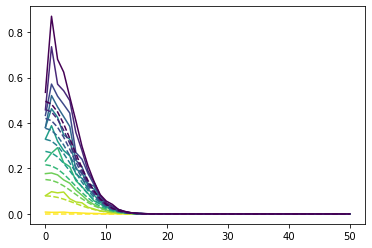

In [25]:
#plt.plot(spec)
scale = 20
for i in range(10):
    plt.plot(K[:N//scale],spec[i,:N//scale],color=colors[i])
    plt.plot(K[:N//scale],spec_analyt_list[i,:N//scale],color=colors[i],linestyle='dashed')
plt.show()

**Variance in Time**

In [41]:
var = np.zeros((N_eval,))

In [42]:
for f in all_files:
    
    npzfile = np.load(f)

    v_real = npzfile['v_real']
    
    var += np.mean( np.abs(v_real)**2, axis=1 )
    
var *= N/len(all_files)

In [43]:
#var_analyt = var_analyt_visc
var_analyt = var_analyt_visc_ornuhl

var_theo = var_analyt(np.arange(N_eval)*dt*N_skip)

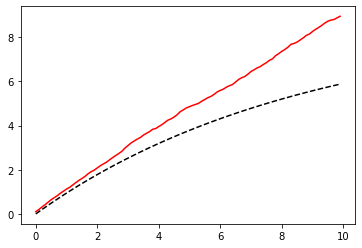

In [44]:
plt.plot(t_eval, var, color='red', label='numerical')
plt.plot(t_eval, var_theo, color='k', linestyle='dashed', label='analytical')
plt.show()

**Velocity Gradient Variance in Time**

In [45]:
velgrad_var_npgrad = np.zeros((N_eval,))
velgrad_var_npfft  = np.zeros((N_eval,))

In [46]:
for f in all_files:
    
    npzfile = np.load(f)

    v_real = npzfile['v_real']
    
    velgrad_var_npgrad += np.mean( np.abs(np.gradient(v_real, dx, axis=1))**2, axis=1 )
    

velgrad_var_npgrad *= N/len(all_files)

In [47]:
#velgrad_var_analyt = velgrad_var_analyt_visc
velgrad_var_analyt = velgrad_var_analyt_visc_ornuhl

velgrad_var_theo = velgrad_var_analyt(np.arange(N_eval)*dt*N_skip)

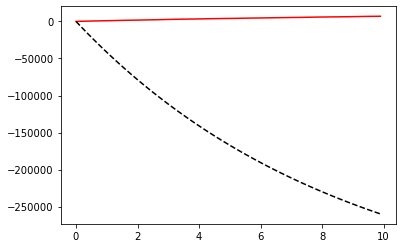

In [48]:
plt.plot(t_eval, velgrad_var_npgrad, color='red', label='numerical')
plt.plot(t_eval, velgrad_var_theo, color='k', linestyle='dashed', label='analytical')
#plt.axhline(y=velgrad_var_analyt_visc_asymp(), color='grey', linestyle='dashed')
plt.show()